## 199 - Lapse Rate Rules of Thumb Part 1

[Youtube](https://www.youtube.com/watch?v=jQK_9F5lFAc)

In [1]:
import pandas as pd
from datetime import datetime
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.iastate import IAStateUpperAir

In [2]:
date = datetime(2021, 9, 18)
station = 'LCH'
station = 'BIS'

In [3]:
df = IAStateUpperAir.request_data(date, station)
df.head()

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,960.0,503.0,21.0,-2.0,160.0,6.0,KBIS,2021-09-18,-2.052121,5.638156
1,952.0,576.0,19.0,-3.0,NaN,NaN,KBIS,2021-09-18,NaN,NaN
2,933.0,746.0,17.2,-3.8,NaN,NaN,KBIS,2021-09-18,NaN,NaN
3,925.0,826.0,16.6,-3.4,170.0,12.0,KBIS,2021-09-18,-2.083778,11.817693
4,915.2,914.0,NaN,NaN,175.0,12.0,KBIS,2021-09-18,-1.045869,11.954336


In [4]:
df_units = df.units
df = df.dropna(subset = ['temperature', 'height'])
df.units = df_units

In [5]:
df.head()

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,960.0,503.0,21.0,-2.0,160.0,6.0,KBIS,2021-09-18,-2.052121,5.638156
1,952.0,576.0,19.0,-3.0,NaN,NaN,KBIS,2021-09-18,NaN,NaN
2,933.0,746.0,17.2,-3.8,NaN,NaN,KBIS,2021-09-18,NaN,NaN
3,925.0,826.0,16.6,-3.4,170.0,12.0,KBIS,2021-09-18,-2.083778,11.817693
6,850.0,1535.0,9.6,-6.4,200.0,17.0,KBIS,2021-09-18,5.814342,15.974775


In [6]:
df = pandas_dataframe_to_unit_arrays(df)

In [7]:
import matplotlib.pyplot as plt

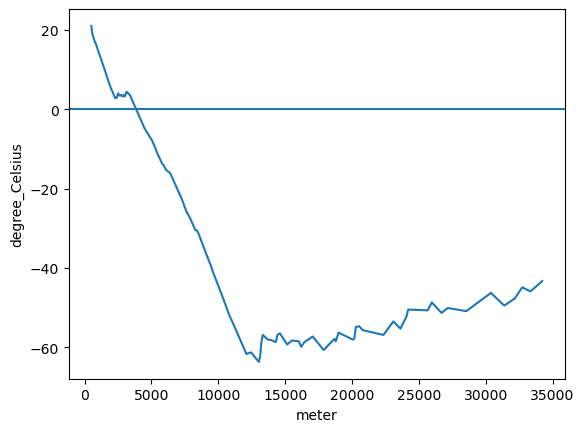

In [8]:
plt.plot(df['height'], df['temperature'])
plt.axhline(y = 0)

In [9]:
import numpy as np

In [10]:
closest_idx = np.argmin(np.abs(df['temperature']))

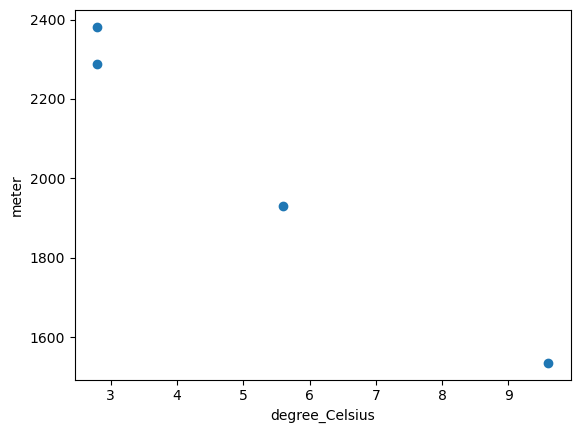

In [11]:
plt.scatter(df['temperature'][closest_idx - 2: closest_idx + 2], df['height'][closest_idx - 2: closest_idx + 2])

In [12]:
coeffs = np.polyfit(df['temperature'][closest_idx - 2: closest_idx + 2].m, df['height'][closest_idx - 2: closest_idx + 2].m, 1)
coeffs

array([-118.62113402, 2650.57989691])

In [13]:
height_est_from_obs = (np.polyval(coeffs, 0) * units.m).to('feet')
height_est_from_obs

8696.128270692961 <Unit('foot')>

In [14]:
height_est_from_rule = df['temperature'][0].m / 2 * 1000 * units.feet
height_est_from_rule

10500.0 <Unit('foot')>

In [15]:
(height_est_from_rule.m - height_est_from_obs.m) / height_est_from_obs.m * 100

20.743389163040657